# Saving a network to a file

Save a `cityseer` prepared `networkx` graph to a file.

To save a graph or to visualise it from QGIS, convert it to a `GeoDataFrame` and save it using `geopandas`.

First, let's create a simple OSM graph from a bounding box, using the same approach as before.


In [1]:
from shapely import geometry

from cityseer.tools import io

poly_wgs = geometry.box(
    -0.14115725966109327,
    51.509220662095714,
    -0.12676440185383622,
    51.51820111033659,
)
G = io.osm_graph_from_poly(poly_wgs)
print(G)

INFO:cityseer.tools.graphs:Generating interpolated edge geometries.
100%|██████████| 4040/4040 [00:00<00:00, 51675.10it/s]
INFO:cityseer.tools.io:Converting networkX graph to CRS code 32630.
INFO:cityseer.tools.io:Processing node x, y coordinates.
100%|██████████| 3735/3735 [00:00<00:00, 1023836.71it/s]
INFO:cityseer.tools.io:Processing edge geom coordinates, if present.
100%|██████████| 4040/4040 [00:00<00:00, 18823.10it/s]
INFO:cityseer.tools.graphs:Removing filler nodes.
100%|██████████| 3735/3735 [00:00<00:00, 24011.87it/s]
INFO:cityseer.tools.util:Creating edges STR tree.
100%|██████████| 2222/2222 [00:00<00:00, 10737.09it/s]
INFO:cityseer.tools.graphs:Removing filler nodes.
100%|██████████| 1427/1427 [00:00<00:00, 328049.98it/s]
INFO:cityseer.tools.graphs:Removing dangling nodes.
INFO:cityseer.tools.graphs:Removing filler nodes.
100%|██████████| 1687/1687 [00:00<00:00, 1271480.84it/s]
INFO:cityseer.tools.util:Creating edges STR tree.
100%|██████████| 1364/1364 [00:00<00:00, 17263

MultiGraph with 384 nodes and 594 edges


Use the [`geopandas_from_nx`](https://cityseer.benchmarkurbanism.com/tools/io#geopandas-from-nx) function to convert the `networkx` dataset into a `geopandas` LineString `GeoDataFrame`.


In [2]:
streets_gpd = io.geopandas_from_nx(G)
streets_gpd.head()

INFO:cityseer.tools.io:Preparing node and edge arrays from networkX graph.


,names,routes,highways,levels,is_tunnel,is_bridge,geom,start_nd_key,end_nd_key,edge_idx
0,[beak street],[],[unclassified],[0],False,False,"LINESTRING (698573.946 5710658.889, 698597.952...",108070,25473512,0
1,[beak street],[],[unclassified],[0],False,False,"LINESTRING (698573.946 5710658.889, 698556.667...",108070,25473371,0
2,[kingly court],[],"[pedestrian, footway]",[0],True,False,"LINESTRING (698573.946 5710658.889, 698573.05 ...",108070,5568839679,0
3,[upper john street],[],[unclassified],[0],False,False,"LINESTRING (698573.946 5710658.889, 698575.964...",108070,25473286,0
4,[great marlborough street],[],[tertiary],[0],False,False,"LINESTRING (698482.48 5710892.514, 698538.717 ...",9791491,21665965,0


Since this is now a `geopandas` `GeoDataFrame`, you can use it accordingly.


<Axes: >

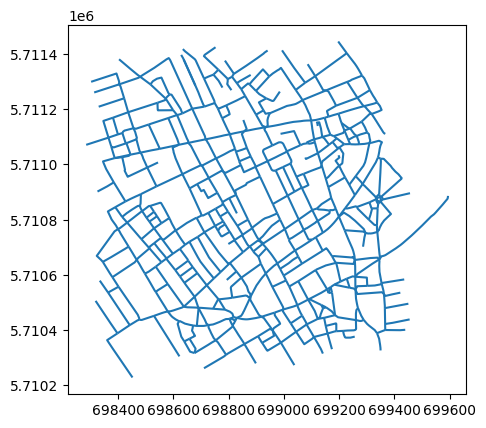

In [3]:
streets_gpd.plot()

`geopandas` can now be used to save the file to disk, it can then be accessed and edited from an application such as QGIS.


In [4]:
streets_gpd.to_file(
    "temp/save_streets_demo.gpkg",
    driver="GPKG",
)

INFO:pyogrio._io:Created 594 records
